In [56]:
import pandas as pd
import numpy as np
import os
import sys
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color='blue', lw=4),
                Line2D([0], [0], color='orange', lw=4)]
# Initialization of directory information:
thisDir = os.path.expanduser('~/Desktop/MSC_Alexis/analysis/')
outDir = thisDir + 'output/mL/results/ridge/permutation/'
regDir = thisDir + 'output/mL/results/ridge/acc/'

taskList=['motor','mem','mixed']
CV=pd.read_csv(regDir+'CV/acc.csv')
CV=pd.melt(CV,id_vars=['sub'],value_vars=['mixed','motor','mem'], var_name='train_task', value_name='acc')

SS=pd.read_csv(regDir+'SS/acc.csv',usecols=[1,2,3,4])
BS=pd.read_csv(regDir+'BS/acc.csv',usecols=[1,2,3,4,5])
DS=pd.read_csv(regDir+'DS/acc.csv',usecols=[1,2,3,4])
DS.rename(columns={'task':'train_task'},inplace=True)

#CV-SS from original analysis
same_task=SS.merge(CV, how='left', on=['train_task','sub'],suffixes=('','_CV'))
same_task['diff']=same_task['acc_CV']-same_task['acc']
within_sub=same_task[['train_task','test_task','diff']]
within=within_sub.groupby(['train_task','test_task']).mean()

#DS-BS
diff_task=BS.merge(DS,how='left',on=['train_task','train_sub','test_sub'],suffixes=('','_DS'))
diff_task['diff']=diff_task['acc_DS']-diff_task['acc']
between_sub=diff_task[['train_task','test_task','diff']]
between=between_sub.groupby(['train_task','test_task']).mean()

#CV-SS
between_permuted=pd.read_csv(outDir+'SS/STmDT_acc.csv')
#DS-BS
within_permuted=pd.read_csv(outDir+'BS/STmDT_acc.csv')


#within
memTmot_with=within_permuted[(within_permuted.train_task=='mem') & (within_permuted.test_task=='motor')]
memTmix_with=within_permuted[(within_permuted.train_task=='mem') & (within_permuted.test_task=='mixed')]
mixTmot_with=within_permuted[(within_permuted.train_task=='mixed') & (within_permuted.test_task=='motor')]
mixTmem_with=within_permuted[(within_permuted.train_task=='mixed') & (within_permuted.test_task=='mem')]
motTmix_with=within_permuted[(within_permuted.train_task=='motor') & (within_permuted.test_task=='mixed')]
motTmem_with=within_permuted[(within_permuted.train_task=='motor') & (within_permuted.test_task=='mem')]


#between
memTmot_bet=between_permuted[(between_permuted.train_task=='mem') & (between_permuted.test_task=='motor')]
memTmix_bet=between_permuted[(between_permuted.train_task=='mem') & (between_permuted.test_task=='mixed')]
mixTmot_bet=between_permuted[(between_permuted.train_task=='mixed') & (between_permuted.test_task=='motor')]
mixTmem_bet=between_permuted[(between_permuted.train_task=='mixed') & (between_permuted.test_task=='mem')]
motTmix_bet=between_permuted[(between_permuted.train_task=='motor') & (between_permuted.test_task=='mixed')]
motTmem_bet=between_permuted[(between_permuted.train_task=='motor') & (between_permuted.test_task=='mem')]



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:68: UserWarning: Calling figure.constrained_layout, but figure not setup to do constrained layout.  You either called GridSpec without the fig keyword, you are using plt.subplot, or you need to call figure or subplots with the constrained_layout=True kwarg.
/opt/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Calling figure.constrained_layout, but figure not setup to do constrained layout.  You either called GridSpec without the fig keyword, you are using plt.subplot, or you need to call figure or subplots with the constrained_layout=True kwarg.
  fig.canvas.print_figure(bytes_io, **kw)


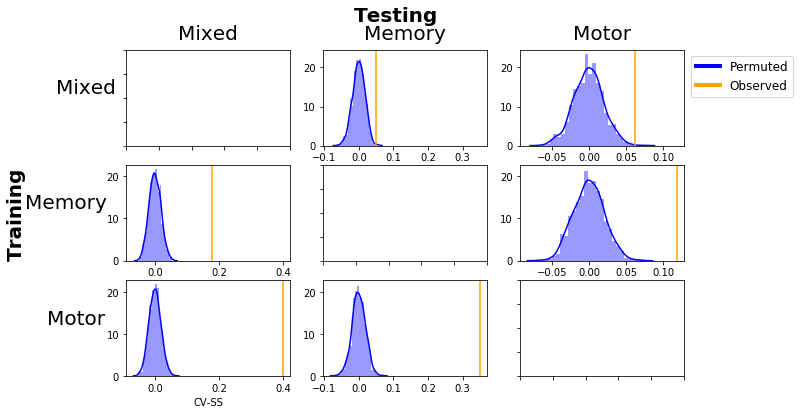

In [52]:
#permutation same task - diff task
#CV-SS

#Diff task 
fig=plt.figure(figsize=(10,6), constrained_layout=True)
plt.rcParams['figure.constrained_layout.use'] = True
#Add grid space for subplots 1 rows by 3 columns
gs = gridspec.GridSpec(nrows=3, ncols=3)
fig.suptitle('Testing', fontsize=20, fontweight='bold')
fig.text(-0.04, 0.5, 'Training', va='center', fontweight='bold',fontsize=20,rotation='vertical')
#Test Mixed blank

ax0=fig.add_subplot(gs[0,0])
plt.setp(ax0.get_yticklabels(), visible=False)
plt.setp(ax0.get_xticklabels(), visible=False)
ax0.set_title('Mixed', fontsize=20, pad=10)
ax0.set_ylabel('Mixed', rotation=0, fontsize=20, labelpad=40)

#Mixed test memory
ax1=fig.add_subplot(gs[0,1])
ax=sns.distplot(mixTmem_with['diff'],color='blue', ax=ax1)
ax.axvline(x = within.iloc[2,0],color='orange')
ax.set_title('Memory',fontsize=20, pad=10)

#Mixed test Motor
ax2=fig.add_subplot(gs[0,2],sharey=ax1)
ax=sns.distplot(mixTmot_with['diff'],color='blue', ax=ax2)
ax.axvline(x = within.iloc[3,0],color='orange')
ax.set_title('Motor', fontsize=20, pad=10)
ax.set(ylabel=' ')
ax.legend(custom_lines, ['Permuted','Observed'],loc='upper right',fontsize='large',bbox_to_anchor=(1.7, 1.0))

#Memory test mixed
ax3=fig.add_subplot(gs[1,0])
ax=sns.distplot(memTmix_with['diff'],color='blue', ax=ax3)
ax.axvline(x = within.iloc[0,0],color='orange')
ax.set_ylabel('Memory', rotation=0, fontsize=20, labelpad=40)

#Memory test memory
ax4=fig.add_subplot(gs[1,1])
plt.setp(ax4.get_yticklabels(), visible=False)
plt.setp(ax4.get_xticklabels(), visible=False)

#Memory test motor
ax5=fig.add_subplot(gs[1,2],sharex=ax2, sharey=ax3)
ax=sns.distplot(memTmot_with['diff'],color='blue', ax=ax5)
ax.axvline(x = within.iloc[1,0],color='orange')

#Motor test mixed
ax6=fig.add_subplot(gs[2,0],sharex=ax3)
ax=sns.distplot(motTmix_with['diff'],color='blue', ax=ax6)
ax.axvline(x = within.iloc[5,0],color='orange')
ax.set_ylabel('Motor', rotation=0, fontsize=20, labelpad=30)
ax.set(xlabel='CV-SS')

#motor test mem
ax7=fig.add_subplot(gs[2,1],sharey=ax6, sharex=ax1)
ax=sns.distplot(motTmem_with['diff'],color='blue', ax=ax7)
ax.axvline(x = within.iloc[4,0],color='orange')
ax.set(xlabel='')

#Motor test motor
ax8=fig.add_subplot(gs[2,2])
plt.setp(ax8.get_yticklabels(), visible=False)
plt.setp(ax8.get_xticklabels(), visible=False)


plt.savefig(thisDir+'output/mL/images/ridge/figs/ST_CVmSS_plots.png', bbox_inches='tight')

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:68: UserWarning: Calling figure.constrained_layout, but figure not setup to do constrained layout.  You either called GridSpec without the fig keyword, you are using plt.subplot, or you need to call figure or subplots with the constrained_layout=True kwarg.
/opt/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Calling figure.constrained_layout, but figure not setup to do constrained layout.  You either called GridSpec without the fig keyword, you are using plt.subplot, or you need to call figure or subplots with the constrained_layout=True kwarg.
  fig.canvas.print_figure(bytes_io, **kw)


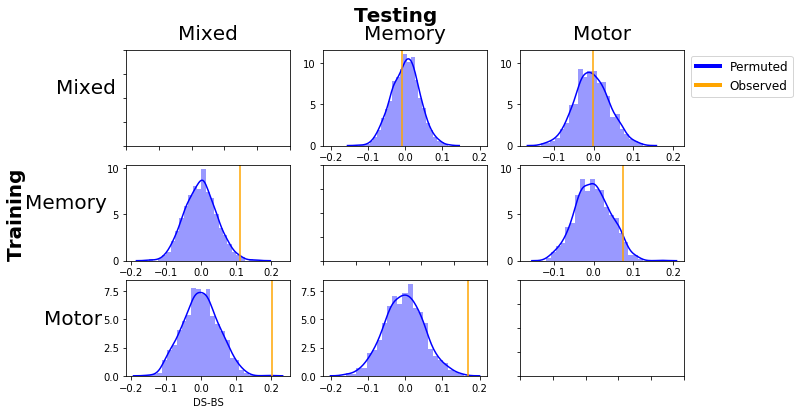

In [55]:
#permutation same task - diff task
#CV-SS

#Diff task 
fig=plt.figure(figsize=(10,6), constrained_layout=True)
plt.rcParams['figure.constrained_layout.use'] = True
#Add grid space for subplots 1 rows by 3 columns
gs = gridspec.GridSpec(nrows=3, ncols=3)
fig.suptitle('Testing', fontsize=20, fontweight='bold')
fig.text(-0.04, 0.5, 'Training', va='center', fontweight='bold',fontsize=20,rotation='vertical')
#Test Mixed blank

ax0=fig.add_subplot(gs[0,0])
plt.setp(ax0.get_yticklabels(), visible=False)
plt.setp(ax0.get_xticklabels(), visible=False)
ax0.set_title('Mixed', fontsize=20, pad=10)
ax0.set_ylabel('Mixed', rotation=0, fontsize=20, labelpad=40)

#Mixed test memory
ax1=fig.add_subplot(gs[0,1])
ax=sns.distplot(mixTmem_bet['diff'],color='blue', ax=ax1)
ax.axvline(x = between.iloc[2,0],color='orange')
ax.set_title('Memory',fontsize=20, pad=10)

#Mixed test Motor
ax2=fig.add_subplot(gs[0,2],sharey=ax1)
ax=sns.distplot(mixTmot_bet['diff'],color='blue', ax=ax2)
ax.axvline(x = between.iloc[3,0],color='orange')
ax.set_title('Motor', fontsize=20, pad=10)
ax.set(ylabel=' ')
ax.legend(custom_lines, ['Permuted','Observed'],loc='upper right',fontsize='large',bbox_to_anchor=(1.7, 1.0))

#Memory test mixed
ax3=fig.add_subplot(gs[1,0])
ax=sns.distplot(memTmix_bet['diff'],color='blue', ax=ax3)
ax.axvline(x = between.iloc[0,0],color='orange')
ax.set_ylabel('Memory', rotation=0, fontsize=20, labelpad=40)

#Memory test memory
ax4=fig.add_subplot(gs[1,1])
plt.setp(ax4.get_yticklabels(), visible=False)
plt.setp(ax4.get_xticklabels(), visible=False)

#Memory test motor
ax5=fig.add_subplot(gs[1,2],sharex=ax2, sharey=ax3)
ax=sns.distplot(memTmot_bet['diff'],color='blue', ax=ax5)
ax.axvline(x = between.iloc[1,0],color='orange')

#Motor test mixed
ax6=fig.add_subplot(gs[2,0],sharex=ax3)
ax=sns.distplot(motTmix_bet['diff'],color='blue', ax=ax6)
ax.axvline(x = between.iloc[5,0],color='orange')
ax.set_ylabel('Motor', rotation=0, fontsize=20, labelpad=30)
ax.set(xlabel='DS-BS')

#motor test mem
ax7=fig.add_subplot(gs[2,1],sharey=ax6, sharex=ax1)
ax=sns.distplot(motTmem_bet['diff'],color='blue', ax=ax7)
ax.axvline(x = between.iloc[4,0],color='orange')
ax.set(xlabel='')

#Motor test motor
ax8=fig.add_subplot(gs[2,2])
plt.setp(ax8.get_yticklabels(), visible=False)
plt.setp(ax8.get_xticklabels(), visible=False)


plt.savefig(thisDir+'output/mL/images/ridge/figs/ST_DSmBS_plots.png', bbox_inches='tight')




In [60]:

within.reset_index(inplace=True)

In [87]:
#dataframe to hold p values for each task by task
#within CV-SS
training=[]
testing=[]
p_values=[]
for train_task in taskList:
    for test_task in taskList:
        if train_task==test_task:
            continue
        else:
            DTmu=within.loc[(within['train_task']==train_task) & (within['test_task']==test_task)]
            DT_perm=within_permuted.loc[(within_permuted['train_task']==train_task) & (within_permuted['test_task']==test_task)]
            DT_perm_kept=DT_perm[DT_perm['diff']>DTmu.iloc[0,2]]
            count=DT_perm_kept['diff'].count()
            pval=(count+1)/(1001)
            training.append(train_task)
            testing.append(test_task)
            p_values.append(pval)
DT_all=pd.DataFrame({'train_task':training,'test_task':testing,'pval':p_values})

In [90]:
between.reset_index(inplace=True)

In [91]:
#dataframe to hold p values for each task by task
#between DS-BS
training=[]
testing=[]
p_values=[]
for train_task in taskList:
    for test_task in taskList:
        if train_task==test_task:
            continue
        else:
            DTmu=between.loc[(between['train_task']==train_task) & (between['test_task']==test_task)]
            DT_perm=between_permuted.loc[(between_permuted['train_task']==train_task) & (between_permuted['test_task']==test_task)]
            DT_perm_kept=DT_perm[DT_perm['diff']>DTmu.iloc[0,2]]
            count=DT_perm_kept['diff'].count()
            pval=(count+1)/(1001)
            training.append(train_task)
            testing.append(test_task)
            p_values.append(pval)
DT_all=pd.DataFrame({'train_task':training,'test_task':testing,'pval':p_values})


In [92]:
DT_all

,train_task,test_task,pval
0,motor,mem,0.000999
1,motor,mixed,0.000999
2,mem,motor,0.049950
3,mem,mixed,0.009990
4,mixed,motor,0.457542
5,mixed,mem,0.610390
